In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-in-poland/Houses.csv


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge,HuberRegressor,Ridge, LinearRegression
from catboost import CatBoostRegressor

In [85]:
data = pd.read_csv('../input/house-prices-in-poland/Houses.csv',encoding='cp1250')

<AxesSubplot:xlabel='city', ylabel='price'>

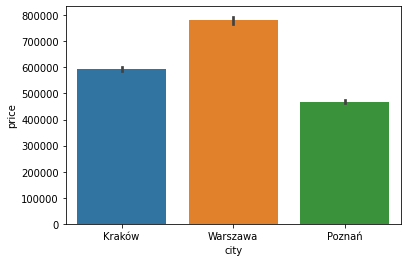

In [86]:
sns.barplot(data=X,y='price',x='city')

In [87]:
data.head(3)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0


In [88]:
data.columns

Index(['Unnamed: 0', 'address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year'],
      dtype='object')

In [89]:
def preprocessing(df):
    df = df.copy()
    df.drop(['Unnamed: 0','address','id'],axis=1,inplace=True)
    y = df['price']
    X = df.drop('price',axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=2)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = preprocessing(data)
X_train.head(3)

,city,floor,latitude,longitude,rooms,sq,year
8934,Kraków,4.0,50.049224,19.970379,2.0,34.53,2021.0
2853,Kraków,0.0,50.020524,19.960179,3.0,55.20,2021.0
8390,Kraków,0.0,50.077825,19.900681,1.0,37.91,2006.0


In [90]:
transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False))
])
preprocessor = ColumnTransformer(transformers=[
    ('nominal',transformer,['city'])
],remainder='passthrough')
model = Pipeline(steps =[
    ('preprocessor',preprocessor),
    ('scaler',StandardScaler()),
    ('regressor',CatBoostRegressor(verbose=0))
])

In [91]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8226575399733675